# Model Training

## 1. Importing Data and Required packages

In [25]:
#Basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv('C:/Users/Admin/Documents/training dataset/student_data.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## preparing X and Y variable

In [8]:
x = df.drop(columns=["math_score"],axis=1)

In [10]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [11]:
y = df['math_score']

In [13]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [15]:
num_features = x.select_dtypes(exclude="object").columns
cat_feature = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
ch_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",ch_transformer,cat_feature),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)

In [16]:
x =preprocessor.fit_transform(x)

In [18]:
x.shape

(1000, 19)

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)
x_train.shape, x_test.shape

((800, 19), (200, 19))

### evaluating model with different metrics

In [30]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    r2_square = r2_score(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    return mae,rmse,r2_square


In [55]:
models = {
    "Linear Regression":  LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(), 
    "Decision Tree": DecisionTreeRegressor(), 
    "Random forest Regressor": RandomForestRegressor(), 
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    #make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #evaluate train and test datasetabs
    model_train_mae , model_train_rmse , model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae , model_test_rmse , model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("R2 score:{:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    

Linear Regression
R2 score:0.8804
Lasso
R2 score:0.8253
Ridge
R2 score:0.8806
K-Neighbors Regressor
R2 score:0.7838
Decision Tree
R2 score:0.7354
Random forest Regressor
R2 score:0.8526
XGBRegressor
R2 score:0.8278
CatBoosting Regressor
R2 score:0.8516
AdaBoost Regressor
R2 score:0.8502


## R2 score metric evaluation

In [58]:
model_r2_score_data = pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model name","R2_score"]).sort_values(by=["R2_score"],ascending=False,ignore_index=True)

In [59]:
model_r2_score_data

,Model name,R2_score
0,Ridge,0.880593
1,Linear Regression,0.880433
2,Random forest Regressor,0.852576
3,CatBoosting Regressor,0.851632
4,AdaBoost Regressor,0.850185
5,XGBRegressor,0.827797
6,Lasso,0.825320
7,K-Neighbors Regressor,0.783813
8,Decision Tree,0.735369


## Linear Regression

In [60]:
linear_model = LinearRegression(fit_intercept=True)
linear_model = linear_model.fit(x_train,y_train)
y_pred = linear_model.predict(x_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)


Accuracy of the model is 88.04


## plot y_pred and y_test

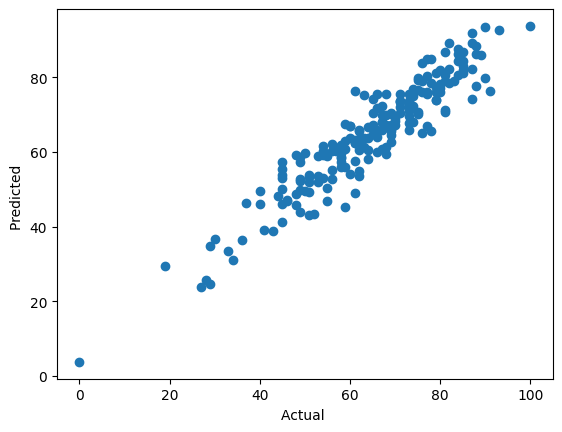

In [61]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual ")
plt.ylabel("Predicted ")
plt.show()

<Axes: xlabel='math_score'>

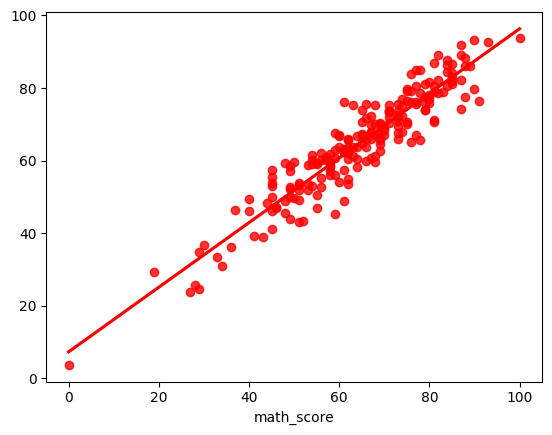

In [63]:
sns.regplot(x=y_test,y=y_pred,ci=None,color="red")

## difference between actual and predicted value

In [64]:
pred_df = pd.DataFrame({"Actual value":y_test,"Predicted value":y_pred,"Difference value":y_test-y_pred})

In [65]:
pred_df

,Actual value,Predicted value,Difference value
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287


# done here!!